In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # 假设使用线性回归作为预测模型


%load_ext autoreload
%autoreload 2
from script.temp.tools.data_utils import data_utils
data = data_utils('config.xlsx','result.xlsx')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
one HotLst: 
 ['HostInterface_Type', 'Data_Cache_Sharing_Mode', 'CMT_Sharing_Mode', 'Plane_Allocation_Scheme', 'Transaction_Scheduling_Policy', 'GC_Block_Selection_Policy', 'Flash_Technology', 'CMD_Suspension_Support', 'Address_Distribution', 'Request_Size_Distribution']
rmLst: 
 ['ssdSeed', 'workloadSeed', 'Enable_ResponseTime_Logging', 'ResponseTime_Logging_Period_Length', 'Enabled_Preconditioning', 'Memory_Type', 'Caching_Mechanism', 'Address_Mapping', 'Flash_Comm_Protocol', 'Page_Capacity', 'Page_Metadat_Capacity', 'Priority_Class', 'Device_Level_Data_Caching_Mode', 'Channel_IDs', 'Chip_IDs', 'Die_IDs', 'Plane_IDs', 'Initial_Occupancy_Percentage', 'Synthetic_Generator_Type', 'Percentage_of_Hot_Region', 'Address_Alignment_Unit', 'Stop_Time', 'Total_Requests_To_Generate']


In [111]:
X = data.X
y = data.Y
from sklearn.preprocessing import MinMaxScaler

# 创建 MinMaxScaler 对象
scaler = MinMaxScaler(feature_range=(0, 1))

# 对每列进行 Min-Max 标准化
y_scaled = pd.DataFrame(columns=y.columns)
for col in y.columns:
    y_scaled[col] = scaler.fit_transform(y[col].values.reshape(-1, 1)).flatten()


PCIe_Lane_Bandwidth                     3.83308
PCIe_Lane_Count                              20
SATA_Processing_Delay                   1633859
IO_Queue_Depth                           280249
Queue_Fetch_Size                           2048
                                         ...   
CMD_Suspension_Support_PROGRAM_ERASE          0
Address_Distribution_RANDOM_UNIFORM           0
Address_Distribution_STREAMING                1
Request_Size_Distribution_FIXED               1
Request_Size_Distribution_NORMAL              0
Name: 1, Length: 100, dtype: object

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 创建并训练随机森林回归模型
model = RandomForestRegressor(n_estimators=100, random_state=42)  # 设置100个决策树
model.fit(X_train, y_train)

# 在训练集和测试集上进行预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 计算均方误差（MSE）来评估模型性能
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("训练集均方误差:", train_mse)
print("测试集均方误差:", test_mse)

训练集均方误差: 5415516792122517.0
测试集均方误差: 1.0050038634416773e+17


In [113]:
train_percentage_error = 100 * abs(y_train - y_train_pred) / abs(y_train)
test_percentage_error = 100 * abs(y_test - y_test_pred) / abs(y_test)

# 计算平均百分比误差
train_mean_percentage_error = train_percentage_error.mean()
test_mean_percentage_error = test_percentage_error.mean()

print("训练集平均百分比误差:", train_mean_percentage_error)
print("测试集平均百分比误差:", test_mean_percentage_error)

训练集平均百分比误差: IOPS_Read          129.340837
IOPS_Write                inf
Bandwidth_Read     175.056682
Bandwidth_Write           inf
dtype: float64
测试集平均百分比误差: IOPS_Read          466.083738
IOPS_Write                inf
Bandwidth_Read     322.302163
Bandwidth_Write           inf
dtype: float64


In [118]:
test_percentage_error
#y_test

,IOPS_Read,IOPS_Write,Bandwidth_Read,Bandwidth_Write
898,359.736221,82.207057,658.414832,252.629985
1062,33.331534,inf,24.838424,inf
1254,27.199796,318.583942,90.962759,578.017843
298,549.447113,47.512131,1294.256080,131.198936
237,4.105308,10.087584,17.455099,23.685300
...,...,...,...,...
534,220.996403,52.715909,170.572396,42.831728
542,1889.254324,2614.789920,293.735492,495.773132
895,26.896633,12.597251,21.434327,9.419648
1092,95.903262,0.270131,80.760267,5.226994


ValueError: supplied range of [0.013438749172027793, inf] is not finite

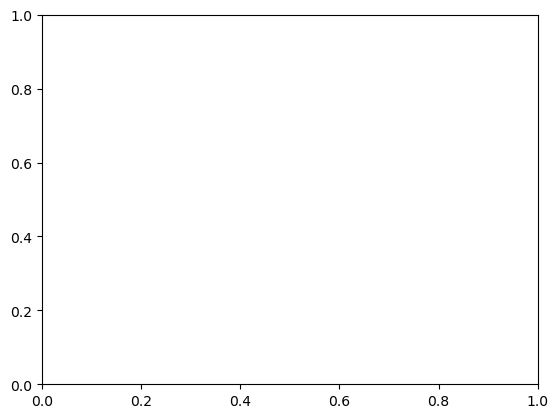

In [116]:
import matplotlib.pyplot as plt

# 绘制分布直方图
plt.hist(test_percentage_error, bins=10, edgecolor='black')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Test Percentage Error')
plt.show()
